In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn.metrics as met

In [161]:
df = pd.read_csv('Social_Network_Ads.csv')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [163]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [165]:
X_scaled = scaler.fit_transform(X.to_numpy())

In [166]:
XS = pd.DataFrame(X_scaled, columns=['Age','EstimatedSalary'])
XS

,Age,EstimatedSalary
0,0.023810,0.029630
1,0.404762,0.037037
2,0.190476,0.207407
3,0.214286,0.311111
4,0.023810,0.451852
...,...,...
395,0.666667,0.192593
396,0.785714,0.059259
397,0.761905,0.037037
398,0.428571,0.133333


# Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XS,y, test_size=0.30, random_state=24)

In [169]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [170]:
predictions = logmodel.predict(X_test)

In [171]:
from sklearn.metrics import classification_report

In [172]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        85
           1       0.92      0.63      0.75        35

    accuracy                           0.88       120
   macro avg       0.89      0.80      0.83       120
weighted avg       0.88      0.88      0.87       120



In [173]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[83  2]
 [13 22]]


In [174]:
logmodel.intercept_

array([-3.99671948])

In [175]:
logmodel.coef_

array([[4.96889728, 2.36711855]])

In [176]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [177]:
# 5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, XS, y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%%" % (results.mean()*100.0))

Accuracy: 82.750%


# Decision Tree

In [178]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import sklearn.model_selection as ms

In [179]:
df['Purchasedstr'] = df['Purchased'].map({1: 'Yes', 0: 'No'})

In [180]:
y = df['Purchasedstr']

In [181]:
X_train, X_test, y_train, y_test = ms.train_test_split(XS,y, test_size=0.3, random_state=24)

In [182]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=24, splitter='best')
model = clf.fit(X_train, y_train)

In [183]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.63
|   |--- feature_1 <= 0.57
|   |   |--- feature_0 <= 0.44
|   |   |   |--- class: No
|   |   |--- feature_0 >  0.44
|   |   |   |--- class: No
|   |--- feature_1 >  0.57
|   |   |--- feature_1 <= 0.88
|   |   |   |--- class: Yes
|   |   |--- feature_1 >  0.88
|   |   |   |--- class: Yes
|--- feature_0 >  0.63
|   |--- feature_0 <= 0.68
|   |   |--- feature_1 <= 0.27
|   |   |   |--- class: Yes
|   |   |--- feature_1 >  0.27
|   |   |   |--- class: No
|   |--- feature_0 >  0.68
|   |   |--- feature_1 <= 0.19
|   |   |   |--- class: Yes
|   |   |--- feature_1 >  0.19
|   |   |   |--- class: Yes



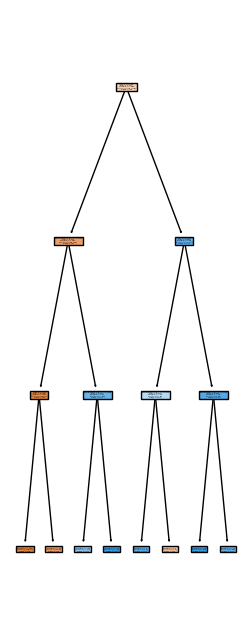

In [184]:
fig = plt.figure(figsize=(3,8))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=df['Purchasedstr'].unique(),
                   filled=True)

### Training Data Accuracy 

In [185]:
y_predt = model.predict(X_train)

In [187]:
print(met.accuracy_score(y_train,y_predt))

0.9071428571428571


In [188]:
print(confusion_matrix(y_train,y_predt))

[[156  16]
 [ 10  98]]


In [189]:
print(classification_report(y_train,y_predt))

              precision    recall  f1-score   support

          No       0.94      0.91      0.92       172
         Yes       0.86      0.91      0.88       108

    accuracy                           0.91       280
   macro avg       0.90      0.91      0.90       280
weighted avg       0.91      0.91      0.91       280



### Testing Data Accuracy 

In [190]:
y_pred = model.predict(X_test)

In [191]:
print(met.accuracy_score(y_test,y_pred))

0.9416666666666667


In [192]:
print(confusion_matrix(y_test,y_pred))

[[82  3]
 [ 4 31]]


In [193]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.95      0.96      0.96        85
         Yes       0.91      0.89      0.90        35

    accuracy                           0.94       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.94      0.94      0.94       120



In [194]:
# 5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = DecisionTreeClassifier (class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=24, splitter='best')
results = cross_val_score(model, XS, y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%%" % (results.mean()*100.0))

Accuracy: 91.250%


# Random Forest 

In [195]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(X_train, y_train)

C:\Users\willi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=10)

### Training Accuracy 

In [196]:
rfc_predt = rfc.predict(X_train)

In [197]:
print(confusion_matrix(y_train,rfc_predt))

[[157  15]
 [ 10  98]]


In [198]:
print(classification_report(y_train,rfc_predt))

              precision    recall  f1-score   support

          No       0.94      0.91      0.93       172
         Yes       0.87      0.91      0.89       108

    accuracy                           0.91       280
   macro avg       0.90      0.91      0.91       280
weighted avg       0.91      0.91      0.91       280



### Testing Accuraccy

In [199]:
rfc_pred = rfc.predict(X_test)

In [200]:
print(confusion_matrix(y_test,rfc_pred))

[[82  3]
 [ 3 32]]


In [201]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

          No       0.96      0.96      0.96        85
         Yes       0.91      0.91      0.91        35

    accuracy                           0.95       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.95      0.95      0.95       120



In [203]:
# 5 folds selected
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
results = cross_val_score(model, XS, y, cv=kfold)
# Output the accuracy. Calculate the mean and std across all folds.
print("Accuracy: %.3f%%" % (results.mean()*100.0))

Accuracy: 91.250%


C:\Users\willi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\willi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

In [205]:
importances = rfc.feature_importances_
columns = X.columns
i = 0
while i < len(columns):
    print(columns[i],'=',round(importances[i]*100,2),"%")
    i += 1

Age = 49.06 %
EstimatedSalary = 50.94 %


We want to determine whether someone will make a purchase based on the available data. The data we have is the age and estimated salary of each individual. It is expected that both variables can be predictors of whether someone will make a purchase, especially the estimated salary variable.

To determine if someone will make a purchase based on two variables, age and estimated salary, we will use classification models such as logistic regression, decision tree, and random forest. Machine learning will be used to build these models. The data will be split into 30% testing data and 70% training data. Performance will be evaluated based on prediction accuracy on the testing data. The data will be scaled because the significant nominal difference between age and estimated salary can hinder the model's performance.

With logistic regression, an accuracy of 82.75% is achieved. The model can correctly classify 88% of the testing data. It can be seen that the precision obtained is 92%, but the recall is only 63%. This means that the model makes many false negative predictions and tends to classify buyers as non-buyers.

With decision tree, an accuracy of 91.25% is achieved when the max depth is limited to 3. The precision and recall obtained are 91% and 89%, respectively. It can be concluded that this model has good performance and does not exhibit bias in classifying data. With a testing accuracy of 91%, it can be stated that there is no overfitting because the accuracy is relatively consistent.

With Random Forest, an accuracy of 91.25% is achieved with a max depth of 3. Both precision and recall obtained are 91%. This model performs slightly better than the decision tree. Since the recall and precision values are the same, the model produces an equal number of false negatives and false positives. The model does not exhibit any bias or specific tendency. From the accuracy obtained from the testing data, it can be concluded that this model does not experience overfiBased on the .

From ran resultsdom forest, it can be seen that the highest feature significance is held by the estimated salary with a value of 50.94%, followed by age with 49.06%. This difference can be considered insignificant.

In conclusion, to classify whether a purchase will be made based on age and estimated salary, the recommended models to use are Random Forest or Decision Tree. Decision tree and random forest achieve higher scores because the data has clear clustering. Logistic regression cannot interpret data clusters using a single equation, but decision tree and random forest can describe these clusters using created rules.cision tree dan random forest dapat menggambarkan cluster tersebut menggunakan rules yang dibuat.